Let's add up numbers drawn from a normal distribution.
According to our friends in the math department, the empirical average
will converge to the actual average by the law of large numbers. In
fact, the average of n variables
	X_i ~ N(m,s)
is distributed according to
	N(m,s/sqrt(n)))
Here we go!

Adding up 50M numbers drawn from N(31.0,1.0)
Block 1/50
   After adding 1M iid numbers
  (actual) Running average: 30.99957200
  (actual) Numerator: 30999572.00000000
  (actual) Numerator+mean-Numerator: 32.00000000
  (theory) 99.9999% CI:   (30.99510836, 31.00489164)
  (theory) % mean < current empirical mean: 0.33432556
  (theory) % mean > current empirical mean: 0.66567444
Block 2/50
   After adding 2M iid numbers
  (actual) Running average: 31.16976000
  (actual) Numerator: 62339520.00000000
  (actual) Numerator+mean-Numerator: 32.00000000
  (actual) (Numerator-last)/blockSize: 31.33994800
  (theory) 99.9999% CI:   (30.99654109, 31.00345891)
  (theory) % mean < current empirical mean: 1.0

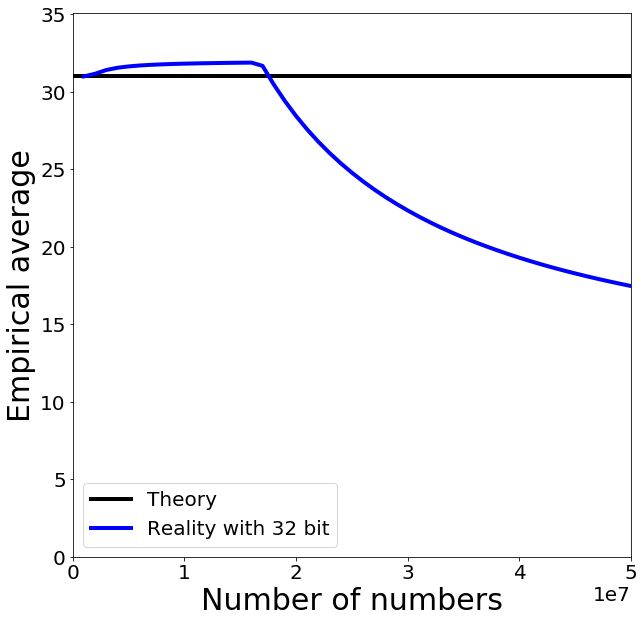

In [0]:
#David Fouhey
#Fractal floating point gone wrong
#Example happens naturally 
#UMich EECS 442 Fall 2019

from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Everything is too small otherwise
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 20; MEDIUM_SIZE = 30; BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
###


if __name__ == "__main__":
  
  #Generate numBlock sets of perBlock (defaults 50 x 1M)
  numBlocks = 50
  perBlock = 1000*1000
  #Generate blocks of normally distributed with the given mean and std
  mean = 31; std = 1
  #use this float format
  floatToUse = np.float32
  
  #accumulate in these
  numerator = np.array(0.0).astype(floatToUse)
  denominator = 0 #np.array(0.0).astype(np.float64)
  
  #keep track of the 
  numNumbers = []
  means = []
  numerators = []
  print("Let's add up numbers drawn from a normal distribution.")
  print("According to our friends in the math department, the empirical average")
  print("will converge to the actual average by the law of large numbers. In")
  print("fact, the average of n variables\n\tX_i ~ N(m,s)\nis distributed according to")
  print("\tN(m,s/sqrt(n)))")
  print("Here we go!\n")
  print("Adding up %dM numbers drawn from N(%.1f,%.1f)" % (numBlocks*perBlock/1000/1000,mean,std))
  
  
  
  for block in range(numBlocks+1):
    #Add another one
    
    
    if block != 0:
      #every few, compute the running estimate of mean plus a 99.9999% CI
      meanStd = std/sqrt(denominator)
      ci = stats.norm.interval(99.9999/100, loc=mean, scale=meanStd)
      currentMean = numerator/denominator
      probOfMean = stats.norm.cdf(currentMean,loc=mean,scale=meanStd)
      
      print("Block %d/%d" % (block,numBlocks))
      print("   After adding %dM iid numbers" % (denominator/1000/1000))
      print("  (actual) Running average: %.8f" % (currentMean))
      print("  (actual) Numerator: %.8f" % numerator)
      print("  (actual) Numerator+mean-Numerator: %.8f" % ((numerator+np.array(mean).astype(floatToUse))-numerator))
     
      
      if len(numerators) > 0:
        print("  (actual) (Numerator-last)/blockSize: %.8f" % ((numerator-numerators[-1]) / float(perBlock)))
        
      
      print("  (theory) 99.9999%% CI:   (%.8f, %.8f)" % (ci[0],ci[1]))
      print("  (theory) %% mean < current empirical mean: %.8f" % probOfMean)
      print("  (theory) %% mean > current empirical mean: %.8f" % (1-probOfMean))
      
      numNumbers.append(denominator) #.copy())
      means.append(numerator/denominator)
      numerators.append(numerator.copy())
      
      
    #generate perBlock normally distributed samples all at once and
    #cast to the appropriate value
    normals = np.random.normal(loc=mean,scale=std,size=(perBlock,)).astype(floatToUse)
    
    #add them all to the numerator
    for i in range(perBlock):
      numerator += normals[i]
    denominator += perBlock
    
  #plot everything
  plt.figure(figsize=(10,10))
  plt.plot([0,numBlocks*perBlock],[mean,mean],linewidth=4,color='k')
  plt.plot(numNumbers,means,linewidth=4,color='b')
  plt.xlim([0,numBlocks*perBlock]); plt.ylim([0,np.max(means)*1.1])
  plt.legend(["Theory","Reality with %d bit" % (numerator.itemsize*8)])
  plt.xlabel("Number of numbers"); plt.ylabel("Empirical average")
  plt.show()